In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlproject/ML_project_kidney_disease.xlsx


Load the Data

In [21]:
df_ckd = pd.read_excel('/kaggle/input/mlproject/ML_project_kidney_disease.xlsx')

In [22]:
# Checking to see if it loaded successfully
df_ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,LEGEND,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,NaN,NaN,NaN,Julian,NaN,NaN,NaN
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,NaN,NaN,NaN,Peter,NaN,NaN,NaN
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,NaN,NaN,NaN,Rachel,NaN,NaN,NaN
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,NaN,NaN,NaN,NaN,NaN,NaN,Taylor,NaN,NaN,NaN
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# looking at the datastructure
# looking for any undesired columns
df_ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [24]:
# Keep the desired columns: 
df_ckd = df_ckd[["id","age","bp","sg","al","su","rbc","pc","pcc","ba","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","htn","dm","cad","appet","pe","ane","classification"]]

In [25]:
# Looking at the datastructure and keep the desired columns
df_ckd.info()
# Check for missing data
df_ckd.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Example of Categorical variable

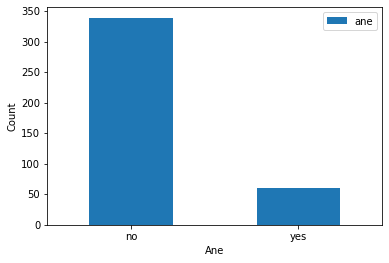

In [26]:
df_ckd['ane'].value_counts().plot(kind='bar')
plt.legend()
plt.xlabel("Ane")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


Identify Target Variable

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


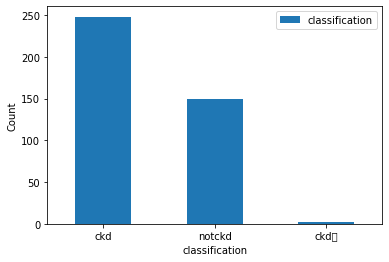

In [27]:
df_ckd['classification'].value_counts().plot(kind='bar')
plt.legend()
plt.xlabel("classification")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [28]:
# classification variable 
df_ckd["classification"] = df_ckd["classification"].astype(str)
clas = df_ckd['classification']
print(clas.describe())
# calculate the amount of missing data
missing_clas = (clas.isnull().sum()/len(clas)) * 100
print("missing clas: ", missing_clas, "%" )

print(df_ckd['pc'].value_counts())


count     400
unique      3
top       ckd
freq      248
Name: classification, dtype: object
missing clas:  0.0 %
normal      259
abnormal     76
Name: pc, dtype: int64


#Missing data

** HANDLING MISSING DATA**

In [29]:
# Determine the number of rows has at least one missing values 
sum(df_ckd.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

242

Removing the row entry that has more than 30% missing

In [30]:
# Calcualting the percentage of missing data in each row
percent_missing = df_ckd.apply(lambda x: sum(x.isnull().values), axis = 1) / len(df_ckd.columns) * 100
df_ckd['percent_missing']=percent_missing
df_ckd.head()
#df_ckd.head()
# Removing the column that has more than 30

percent_cutoff = 30
df_ckd_1 = df_ckd[df_ckd.percent_missing < percent_cutoff]


df_ckd_1.info()
df_ckd_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 399
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               369 non-null    int64  
 1   age              362 non-null    float64
 2   bp               359 non-null    float64
 3   sg               342 non-null    float64
 4   al               342 non-null    float64
 5   su               341 non-null    float64
 6   rbc              245 non-null    object 
 7   pc               325 non-null    object 
 8   pcc              365 non-null    object 
 9   ba               365 non-null    object 
 10  bgr              336 non-null    float64
 11  bu               358 non-null    float64
 12  sc               360 non-null    float64
 13  sod              302 non-null    float64
 14  pot              301 non-null    float64
 15  hemo             337 non-null    float64
 16  pcv              328 non-null    object 
 17  wc              

id                   0
age                  7
bp                  10
sg                  27
al                  27
su                  28
rbc                124
pc                  44
pcc                  4
ba                   4
bgr                 33
bu                  11
sc                   9
sod                 67
pot                 68
hemo                32
pcv                 41
wc                  76
rc                  99
htn                  2
dm                   2
cad                  2
appet                1
pe                   1
ane                  1
classification       0
percent_missing      0
dtype: int64

We removed 31 observations for the rows that has more than 30% missing.

Next, we want to know how many missing for each column and percentage of missing.

In [31]:
missing_values = pd.DataFrame()

In [32]:
missing_values['count']=df_ckd_1.isnull().sum()
missing_values['percentage']=df_ckd_1.isnull().sum()/len(df_ckd_1.classification)*100

In [33]:
missing_values.columns

Index(['count', 'percentage'], dtype='object')

In [34]:
missing_values.drop('percent_missing',axis = 0)
missing_values.sort_values(by="percentage",axis = 0, ascending = True).round(2)

,count,percentage
id,0,0.00
classification,0,0.00
percent_missing,0,0.00
appet,1,0.27
ane,1,0.27
pe,1,0.27
cad,2,0.54
htn,2,0.54
dm,2,0.54
pcc,4,1.08


We reset the indices for better analyzation.

In [35]:
df_ckd_1.reset_index(drop=True, inplace=True)

Look at each variable importance to the predictor. 

T-test is used on continous variable .

Chi-sqaure is used on categorical variable.

Output should be: Pot (Potassium is not significant)

In [36]:
##############CODE NEEDED FOR T-test and CHI-SQAURE#########################

In [37]:
#T-test

In [38]:
!pip install bioinfokit

     |████████████████████████████████| 42 kB 646 kB/s eta 0:00:011
  Created wheel for bioinfokit: filename=bioinfokit-0.8.8-py3-none-any.whl size=29549 sha256=bd882afc5abcfe33a8294ddb190217138a3e88b53e5dc29781e8e6b475935807
  Stored in directory: /root/.cache/pip/wheels/ef/99/80/3f7c0f980c3083fcf2f15d7f6a16f08a65d231db5a107f7e69
Successfully built bioinfokit


In [39]:
import scipy.stats as stats
import math
from bioinfokit.analys import get_data, stat

Age T Test:

Two sample ['ckd' 'notckd'] t-test with unequal variance 

------------------  ------------
Mean diff           10.6008
t                    4.24103
Std Error            2.49959
df                  84.9932
P-value (one-tail)   2.81826e-05
P-value (two-tail)   5.63651e-05
Lower 95.0%          5.63096
Upper 95.0%         15.5707
------------------  ------------ 

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
ckd            43  57.2791    13.463       2.0531         53.1358        61.4224
notckd        115  46.6783    15.2893      1.42574        43.8539        49.5026 

Blood Pressure T Test:

Two sample ['ckd' 'notckd'] t-test with unequal variance 

------------------  ------------
Mean diff            8.17391
t                    3.47354
Std Error            2.35319
df                  53.8743
P-value (one-tail)   0.000510664
P-value (two

<Figure size 432x288 with 0 Axes>

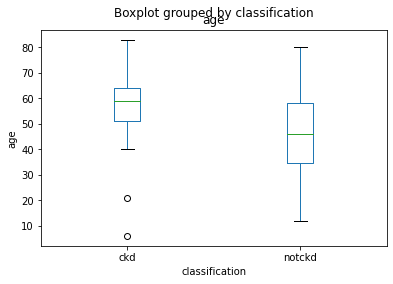

<Figure size 432x288 with 0 Axes>

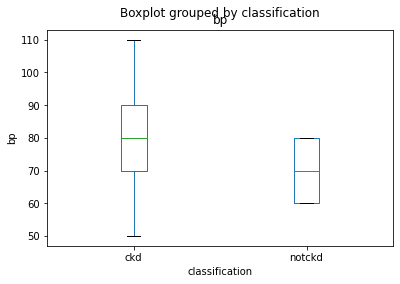

<Figure size 432x288 with 0 Axes>

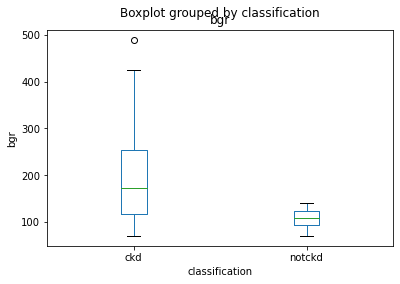

<Figure size 432x288 with 0 Axes>

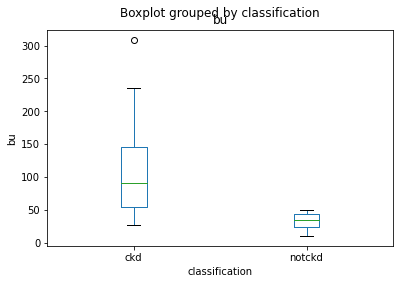

<Figure size 432x288 with 0 Axes>

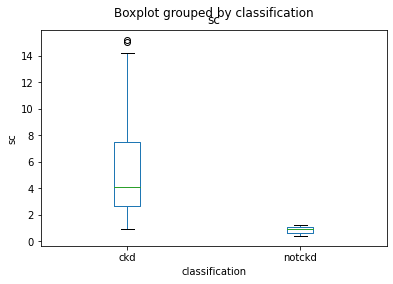

<Figure size 432x288 with 0 Axes>

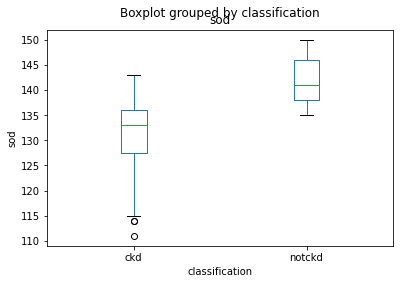

<Figure size 432x288 with 0 Axes>

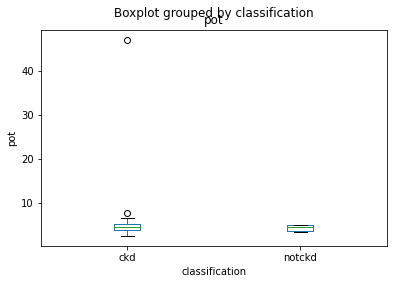

<Figure size 432x288 with 0 Axes>

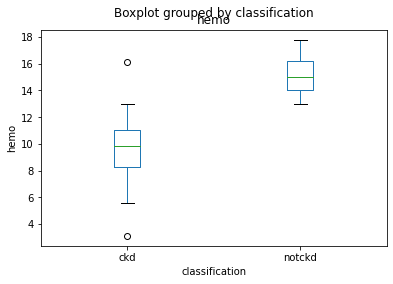

<Figure size 432x288 with 0 Axes>

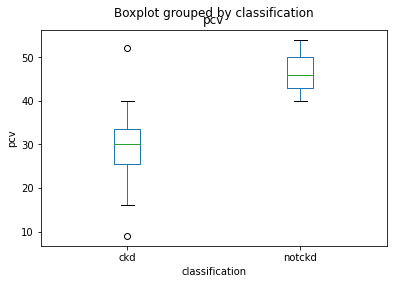

In [40]:
print('\033[1m' + 'Age T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="age", evar=False)
print('\033[1m' + 'Blood Pressure T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="bp", evar=False)

print('\033[1m' + 'Blood Glucose Random T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="bgr", evar=False)
print('\033[1m' + 'Blood Urea T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="bu", evar=False)
print('\033[1m' + 'Serum Creatinine T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="sc", evar=False)
print('\033[1m' + 'Sodium T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="sod", evar=False)
print('\033[1m' + 'Potassium T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="pot", evar=False)
print('\033[1m' + 'Hemoglobin T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="hemo", evar=False)
print('\033[1m \033[91m \033[4m' + 'Packed Cell Volume T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="pcv", evar=False)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


  White Blood Cell Count T Test:

Two sample ['ckd' 'notckd'] t-test with unequal variance 

------------------  --------------
Mean diff           2854.36
t                      3.90156
Std Error            731.593
df                    46.6635
P-value (one-tail)     0.000152676
P-value (two-tail)     0.000305352
Lower 95.0%         1382.3
Upper 95.0%         4326.41
------------------  -------------- 

Parameter estimates

Level      Number      Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  --------  ---------  -----------  -------------  -------------
ckd            43  10553.5     4671.46      712.391        9115.82        11991.2
notckd        115   7699.13    1785.69      166.516        7369.26         8029 

  Red Blood Cell Count T Test:

Two sample ['ckd' 'notckd'] t-test with unequal variance 

------------------  -------------
Mean diff            -1.64378
t                   -10.5371
Std Error             0.156
df                   54.5482
P-

<Figure size 432x288 with 0 Axes>

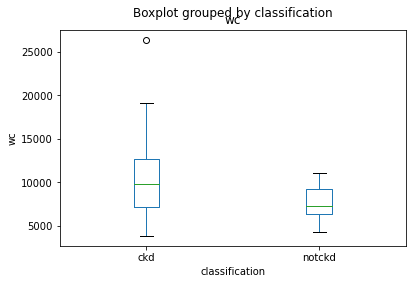

<Figure size 432x288 with 0 Axes>

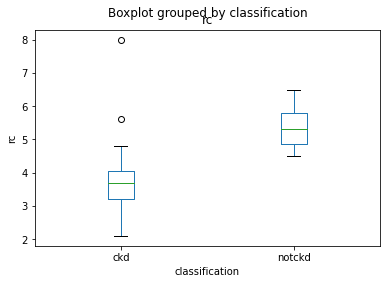

In [41]:
df_ckd_2 = df_ckd_1
df_ckd_2["wc"].replace("\t?",np.nan, inplace=True)
df_ckd_2["rc"].replace("\t?",np.nan, inplace=True)
df_ckd_2[['wc']]=df_ckd_2[['wc']].astype(float)
df_ckd_2[['rc']]=df_ckd_2[['rc']].astype(float)


print('\033[1m \033[91m \033[4m' + 'White Blood Cell Count T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_2, xfac="classification", res="wc", evar=False)
print('\033[1m \033[91m \033[4m' + 'Red Blood Cell Count T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_2, xfac="classification", res="rc", evar=False)

Closer look on Potassium

Potassium T Test:

Two sample ['ckd' 'notckd'] t-test with unequal variance 

------------------  ---------
Mean diff            1.19567
t                    1.19189
Std Error            1.00317
df                  42.2604
P-value (one-tail)   0.119977
P-value (two-tail)   0.239955
Lower 95.0%         -0.828443
Upper 95.0%          3.21979
------------------  --------- 

Parameter estimates

Level      Number     Mean    Std Dev    Std Error    Lower 95.0%    Upper 95.0%
-------  --------  -------  ---------  -----------  -------------  -------------
ckd            43  5.50698   6.56808     1.00162          3.48562        7.52833
notckd        115  4.3113    0.597769    0.0557422        4.20088        4.42173 



<Figure size 432x288 with 0 Axes>

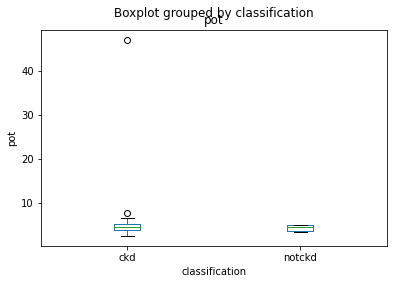

In [42]:
print('\033[1m' + 'Potassium T Test:' + '\033[0m')
stat.ttsam(df=df_ckd_1, xfac="classification", res="pot", evar=False)


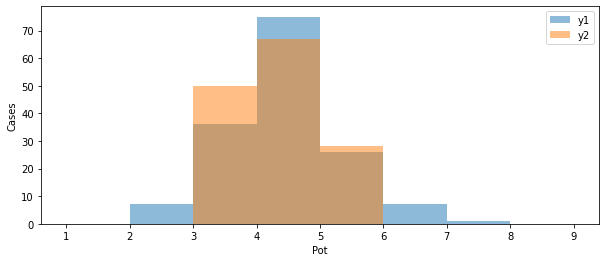

In [43]:
y1 = df_ckd_1.pot[df_ckd_1['classification'] == 'ckd']
y1 = y1.dropna()
y2 = df_ckd_1.pot[df_ckd_1['classification'] == 'notckd']
y2 = y2.dropna()
plt.figure(figsize=(10, 4))
plt.hist(y1, bins=np.arange(1, 10, 1), alpha=0.5, label="y1")
plt.hist(y2, bins=np.arange(1, 10, 1), alpha=0.5, label="y2")
plt.legend()
plt.xlabel("Pot")
plt.ylabel("Cases")
plt.show()

Remove Potassium since the t-test showed non-signifcant

In [44]:
del df_ckd_1['pot']

Categorical

In [45]:
df_ckd_1.replace("ckd\t","ckd",inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [46]:
# wc
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['wc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

Degree of Freedom:- 1
p-value: 0.165915861354751
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.165915861354751


In [47]:
print("rbc")
df_table_rbc = pd.crosstab(df_ckd_1['classification'],df_ckd_1['rbc'])
#print(df_table_rbc)
df_table_rbc.values
Observed_values_rbc = df_table_rbc.values
#print("Observed Values :-\n",Observed_values_rbc)
val_rbc=stats.chi2_contingency(df_table_rbc)
val_rbc
expected_values_rbc=val_rbc[3]
no_of_rows_rbc=len(df_table_rbc.iloc[0:2,0])
no_of_columns_rbc=len(df_table_rbc.iloc[0,0:2])
ddof_rbc=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
from scipy.stats import chi2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
#print("chi-square statistic:-",chi_square_statistic)
p_value_rbc=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value_rbc)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value_rbc)



rbc
Degree of Freedom:- 1
p-value: 0.165915861354751
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.165915861354751


In [48]:
# pcc
print("pcc")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pcc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

pcc
Degree of Freedom:- 1
p-value: 1.8548487190628293e-08
Significance level:  0.05
Degree of Freedom:  1
p-value: 1.8548487190628293e-08


In [49]:
# PC
print("PC")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

PC
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [50]:
#HTN
print("HTN")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)


HTN
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [51]:
#cad
print("cad")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)


cad
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [52]:
#DM
print("DM")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

DM
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [53]:
#APPET
print("APPET")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

APPET
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [54]:
#PE
print("PE")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

PE
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [55]:
#ANE
print("ANE")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

ANE
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [56]:
#BA

print("BA")
df_table=pd.crosstab(df_ckd_1['classification'],df_ckd_1['pc'])
# print(df_table)

df_table.values
Observed_values = df_table.values
#print("Observed Values :-\n",Observed_values)

val=stats.chi2_contingency(df_table)
val

expected_values=val[3]

no_of_rows=len(df_table.iloc[0:2,0])
no_of_columns=len(df_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic:-",chi_square_statistic)


#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

BA
Degree of Freedom:- 1
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


Addressing the variables that has less than 12% 

In [57]:
#appet

#calculate the amount of missing data
appet = df_ckd_1['appet']
missing_appet = (appet.isnull().sum()/len(appet)) * 100
print("missing appet: ", missing_appet, "%" )



print(df_ckd_1['appet'].value_counts())
#Replace the "cad" with the most frequent density
df_ckd_1["appet"].replace(np.nan, "good", inplace=True)

missing appet:  0.27100271002710025 %
good    298
poor     70
Name: appet, dtype: int64


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [58]:
#ane

#calculate the amount of missing data
ane = df_ckd_1['ane']
ane.describe()
missing_ane = (ane.isnull().sum()/len(ane)) * 100
print("missing ane: ", missing_ane, "%" )

#######################################

print(df_ckd_1['ane'].value_counts())
#Replace the "cad" with the most frequent density
df_ckd_1["ane"].replace(np.nan, "no", inplace=True)

missing ane:  0.27100271002710025 %
no     314
yes     54
Name: ane, dtype: int64


In [59]:
#pe

#calculate the amount of missing data
pe = df_ckd_1['pe']
missing_pe = (pe.isnull().sum()/len(pe)) * 100
print("missing pe: ", missing_pe, "%" )



print(df_ckd_1['pe'].value_counts())
#Replace the "cad" with the most frequent density
df_ckd_1["pe"].replace(np.nan, "no", inplace=True)

missing pe:  0.27100271002710025 %
no     300
yes     68
Name: pe, dtype: int64


In [60]:
#cad

#calculate the amount of missing data
cad = df_ckd_1['cad']
missing_cad = (cad.isnull().sum()/len(cad)) * 100
print("missing cad: ", missing_cad, "%" )


df_ckd_1["cad"].replace("\tno", "no", inplace=True)

print(df_ckd_1['cad'].value_counts())
#Replace the "cad" with the most frequent density
df_ckd_1["cad"].replace(np.nan, "no", inplace=True)

missing cad:  0.5420054200542005 %
no     335
yes     32
Name: cad, dtype: int64


In [61]:
#htn

#calculate the amount of missing data
htn = df_ckd_1['htn']
missing_htn = (htn.isnull().sum()/len(htn)) * 100
print("missing htn: ", missing_htn, "%" )


print(df_ckd_1['htn'].value_counts())

#Replace the "htn" with the most frequent density
df_ckd_1["htn"].replace(np.nan, "no", inplace=True)

missing htn:  0.5420054200542005 %
no     235
yes    132
Name: htn, dtype: int64


In [62]:
#dm

#calculate the amount of missing data
dm = df_ckd_1['dm']
missing_dm = (dm.isnull().sum()/len(dm)) * 100
print("missing dm: ", missing_dm, "%" )


#Fixing the space issue in our dataframe
df_ckd_1["dm"].replace("\tno", "no", inplace=True)
df_ckd_1["dm"].replace("\tyes", "yes", inplace=True)

print(df_ckd_1['dm'].value_counts())
#Replace the "pc" with the most frequent density
df_ckd_1["dm"].replace(np.nan, "no", inplace=True)


missing dm:  0.5420054200542005 %
no     247
yes    120
Name: dm, dtype: int64


In [63]:
#pcc
#calculate the amount of missing data
pcc = df_ckd_1['pcc']
missing_pcc = (pcc.isnull().sum()/len(pcc)) * 100
print("missing pcc: ", missing_pcc, "%" )


print(df_ckd_1['pcc'].value_counts())
# Replace the "pc" with the most frequent density
df_ckd_1["pcc"].replace(np.nan, "notpresent", inplace=True)

missing pcc:  1.084010840108401 %
notpresent    323
present        42
Name: pcc, dtype: int64


In [64]:
#ba
ba = df_ckd_1['ba']
missing_ba = (ba.isnull().sum()/len(ba)) * 100
print("missing ba: ", missing_ba, "%" )

print(df_ckd_1['ba'].value_counts())
# Replace the "pc" with the most frequent density
df_ckd_1["ba"].replace(np.nan, "notpresent", inplace=True)

missing ba:  1.084010840108401 %
notpresent    343
present        22
Name: ba, dtype: int64


count    362.000000
mean      51.428177
std       16.873378
min        3.000000
25%       42.000000
50%       54.000000
75%       64.000000
max       90.000000
Name: age, dtype: float64
Number of missing:  7
missing age:  1.8970189701897018 %
Average of age 51.42817679558011


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


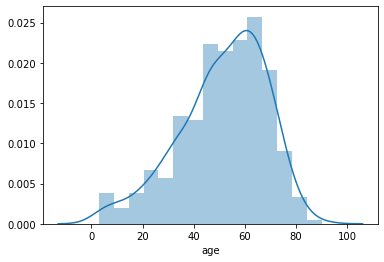

In [65]:
# Age

age = df_ckd_1['age']
print(age.describe())

#calculate the amount of missing data
missing_age = (age.isnull().sum()/len(age)) * 100
number_of_missing_data=age.isnull().sum()
print("Number of missing: ", number_of_missing_data)
print("missing age: ", missing_age, "%" )
sns.distplot(age)

# Adding in the missing values with average for age

avg_age=df_ckd_1["age"].mean(axis=0)
print("Average of age", avg_age)
df_ckd_1["age"].replace(np.nan, avg_age, inplace=True)

count    360.000000
mean       2.899861
std        5.372400
min        0.400000
25%        0.900000
50%        1.200000
75%        2.725000
max       76.000000
Name: sc, dtype: float64
missing sc:  2.4390243902439024 %
Average of sc 2.8998611111111137


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


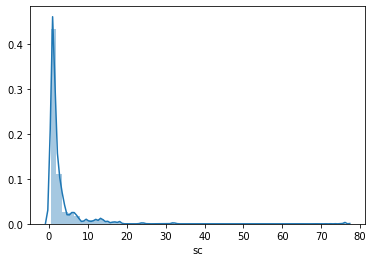

In [66]:
# sc
sc = df_ckd_1['sc']
print(sc.describe()) #calculate the amount of missing data
missing_sc = (sc.isnull().sum()/len(sc)) * 100
print("missing sc: ", missing_sc, "%" )
sns.distplot(sc)

avg_sc=df_ckd_1["sc"].mean(axis=0)
print("Average of sc", avg_sc)
df_ckd_1["sc"].replace(np.nan, avg_sc, inplace=True)

count    359.000000
mean      76.462396
std       13.903824
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64
missing bp:  2.710027100271003 %
Average of bp 76.46239554317549


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


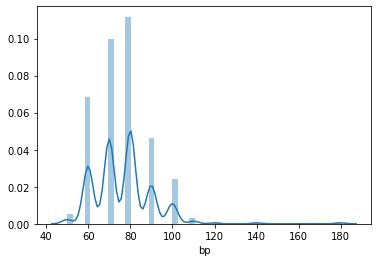

In [67]:
# bp
# it is a continous variable. May look categorical
bp = df_ckd_1['bp']
print(bp.describe())

#calculate the amount of missing data
missing_bp = (bp.isnull().sum()/len(bp)) * 100
print("missing bp: ", missing_bp, "%" )
sns.distplot(bp)

# Updating the missing values
avg_bp=df_ckd_1["bp"].mean(axis=0)
print("Average of bp", avg_bp)
df_ckd_1["bp"].replace(np.nan, avg_bp, inplace=True)


count    358.000000
mean      56.251676
std       50.360447
min        1.500000
25%       26.000000
50%       40.500000
75%       60.000000
max      391.000000
Name: bu, dtype: float64
missing bu:  2.9810298102981028 %
Average of bu 56.251675977653626


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


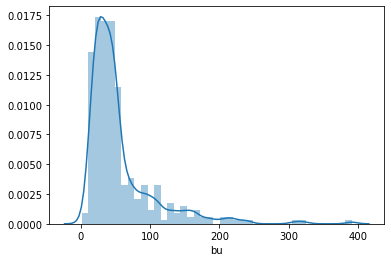

In [68]:
# bu 
bu = df_ckd_1['bu']
print(bu.describe()) #calculate the amount of missing data
missing_bu = (bu.isnull().sum()/len(bu)) * 100
print("missing bu: ", missing_bu, "%" )
sns.distplot(bu)

# Updating the bu
avg_bu=df_ckd_1["bu"].mean(axis=0)
print("Average of bu", avg_bu)
df_ckd_1["bu"].replace(np.nan, avg_bu, inplace=True)

In [69]:
# al
al = df_ckd_1['al']
print(al.describe())
# calculate the amount of missing data
missing_al = (al.isnull().sum()/len(al)) * 100
print("missing rbc: ", missing_al, "%" )
al_group = df_ckd.groupby('su').id.agg(['count'])
print(al_group)

# Replace the "al" with the most frequent density
df_ckd_1["al"].replace(np.nan, "0.0", inplace=True)

count    342.000000
mean       1.017544
std        1.359117
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: al, dtype: float64
missing rbc:  7.317073170731707 %
     count
su        
0.0    290
1.0     13
2.0     18
3.0     14
4.0     13
5.0      3


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
# sg
# Even though it should be continous. it is categorical
sg = df_ckd_1['sg']
print(sg.describe()) #calculate the amount of missing data
missing_sg = (sg.isnull().sum()/len(sg)) * 100
print("missing sg: ", missing_sg, "%" )
print(df_ckd_1['sg'].value_counts())

# Replace the "sg" with the most frequent density
df_ckd_1["sg"].replace(np.nan, "1.020", inplace=True)

count    342.000000
mean       1.017515
std        0.005728
min        1.005000
25%        1.011250
50%        1.020000
75%        1.020000
max        1.025000
Name: sg, dtype: float64
missing sg:  7.317073170731707 %
1.020    103
1.025     81
1.010     79
1.015     72
1.005      7
Name: sg, dtype: int64


In [71]:
# su variable 
# It is a categorical variable
# Convert that into an object
df_ckd_1["su"].astype(object)

su = df_ckd_1['su']
print(su.describe())
# calculate the amount of missing data
missing_su = (su.isnull().sum()/len(su)) * 100
print("missing su: ", missing_al, "%" )

#Finding the most frequent
su_group = df_ckd.groupby('su').id.agg(['count'])
print(su_group)


# Replace the "al" with the most frequent density
df_ckd_1["su"].replace(np.nan, "0.0", inplace=True)


count    341.000000
mean       0.442815
std        1.098307
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: su, dtype: float64
missing su:  7.317073170731707 %
     count
su        
0.0    290
1.0     13
2.0     18
3.0     14
4.0     13
5.0      3


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


count    337.000000
mean      12.606825
std        2.898971
min        3.100000
25%       10.400000
50%       13.000000
75%       15.000000
max       17.800000
Name: hemo, dtype: float64
missing hemo:  8.672086720867208 %
Number of missing:  32
Average of hemo 12.606824925816031


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


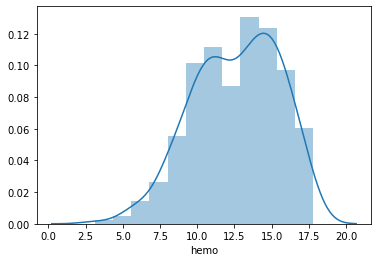

In [72]:
# hemo
hemo = df_ckd_1['hemo']
print(hemo.describe()) #calculate the amount of missing data
missing_hemo = (hemo.isnull().sum()/len(hemo)) * 100
print("missing hemo: ", missing_hemo, "%" )
number_of_missing_data=hemo.isnull().sum()
print("Number of missing: ", number_of_missing_data)
sns.distplot(hemo)

avg_hemo=df_ckd_1["hemo"].mean(axis=0)
print("Average of hemo", avg_hemo)
df_ckd_1["hemo"].replace(np.nan, avg_hemo, inplace=True)

count    336.000000
mean     147.190476
std       77.568108
min       22.000000
25%       99.750000
50%      121.000000
75%      162.250000
max      490.000000
Name: bgr, dtype: float64
missing ba:  8.94308943089431 %
Average of bgr 147.1904761904762


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


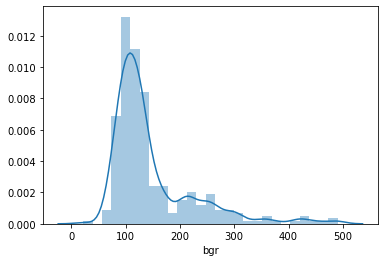

In [73]:
#bgr
bgr = df_ckd_1['bgr']
print(bgr.describe())

#calculate the amount of missing data
missing_bgr = (bgr.isnull().sum()/len(bgr)) * 100
print("missing ba: ", missing_bgr, "%" )
sns.distplot(bgr)
avg_bgr=df_ckd_1["bgr"].mean(axis=0)
print("Average of bgr", avg_bgr)
df_ckd_1["bgr"].replace(np.nan, avg_bgr, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


count    327.000000
mean      38.874618
std        9.014620
min        9.000000
25%       32.000000
50%       40.000000
75%       45.000000
max       54.000000
Name: pcv, dtype: float64
missing pcv:  11.38211382113821 %
Average of pcv 38.87461773700306


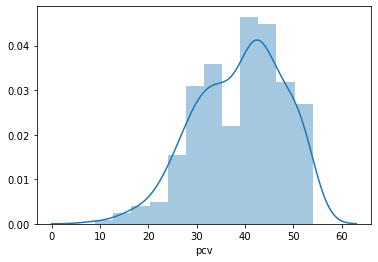

In [74]:
# PCV

df_ckd_1["pcv"].replace("\t43", "43", inplace=True)
df_ckd_1["pcv"].replace("\t?",np.nan, inplace=True)
df_ckd_1['pcv'].value_counts()

df_ckd_1["pcv"] = df_ckd_1["pcv"].astype(float)
pcv = df_ckd_1['pcv']
print(pcv.describe()) #calculate the amount of missing data
missing_pcv = (pcv.isnull().sum()/len(pcv)) * 100
print("missing pcv: ", missing_pcv, "%" )
sns.distplot(pcv)


avg_pcv=df_ckd_1["pcv"].mean(axis=0)
print("Average of pcv", avg_pcv)
# Replace the "pcv" with the mean 
df_ckd_1["pcv"].replace(np.nan, avg_pcv, inplace=True)

In [75]:
# pc variable 

pc = df_ckd_1['pc']
print(pc.describe())
# calculate the amount of missing data
missing_pc = (pc.isnull().sum()/len(pc)) * 100
print("missing pc: ", missing_al, "%" )


print(df_ckd_1['pc'].value_counts())
# Replace the "pc" with the most frequent density
df_ckd_1["pc"].replace(np.nan, "normal", inplace=True)

count        325
unique         2
top       normal
freq         253
Name: pc, dtype: object
missing pc:  7.317073170731707 %
normal      253
abnormal     72
Name: pc, dtype: int64


####### Reviewing the current changes made ###################

In [76]:
df_ckd_1.info()
df_ckd_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               369 non-null    int64  
 1   age              369 non-null    float64
 2   bp               369 non-null    float64
 3   sg               369 non-null    object 
 4   al               369 non-null    object 
 5   su               369 non-null    object 
 6   rbc              245 non-null    object 
 7   pc               369 non-null    object 
 8   pcc              369 non-null    object 
 9   ba               369 non-null    object 
 10  bgr              369 non-null    float64
 11  bu               369 non-null    float64
 12  sc               369 non-null    float64
 13  sod              302 non-null    float64
 14  hemo             369 non-null    float64
 15  pcv              369 non-null    float64
 16  wc               292 non-null    float64
 17  rc              

id                   0
age                  0
bp                   0
sg                   0
al                   0
su                   0
rbc                124
pc                   0
pcc                  0
ba                   0
bgr                  0
bu                   0
sc                   0
sod                 67
hemo                 0
pcv                  0
wc                  77
rc                 100
htn                  0
dm                   0
cad                  0
appet                0
pe                   0
ane                  0
classification       0
percent_missing      0
dtype: int64

###################### Now handling the more complicated issue####################################

Changing the sod

* The current method is replaced with average.
* correlated bp and cad


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# Getting the Data ready for the Linear Regression
data = df_ckd_1[['id','bp','cad','sod']]
# changing the cad
data = pd.get_dummies(data, columns = ['cad'])
del data['cad_no']
missing_data = data['sod'].isnull()
missing_data_tip = pd.DataFrame(data[['bp','cad_yes']][missing_data])
data_nomissing = data.dropna()
x = data_nomissing[['bp','cad_yes']]
y = data_nomissing['sod']

In [79]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)
lm = LinearRegression().fit(X_train, y_train)
# Descriptive statistic for evaluating the model
yhat = lm.predict(X_test)
SS_R = sum((yhat-np.mean(y_test))**2)       
SS_Total = sum((y_test-np.mean(y_test))**2) 
r_squared = (float(SS_R))/SS_Total
mse = mean_squared_error(y_test, yhat)

print("r_sqaured: ",round(r_squared,2))
print("mse: ", round(mse,2))

r_sqaured:  0.26
mse:  62.86


In [80]:
# Replacing on to the orginal dataframe
data_pred = lm.predict(missing_data_tip)
missing_data_tip['data_pred'] = data_pred
data["data_pred"] = missing_data_tip["data_pred"]
data["sod"].replace(np.nan, 0, inplace=True)
data["data_pred"].replace(np.nan, 0, inplace=True)
data["sod"] = data["sod"]+data["data_pred"]
df_ckd_1["sod"]=data["sod"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Replacing with the mean average (NOT USED ANYMORE)

In [81]:
# sod 

# sod = df_ckd_1['sod']
# print(sod.describe()) #calculate the amount of missing data
# missing_sod = (sod.isnull().sum()/len(sod)) * 100
# print("missing sod: ", missing_sod, "%" )
# sns.distplot(sod)

# # Changing sod
# avg_sod=df_ckd_1["sod"].mean(axis=0)
# print("Average of sod", avg_sod)
# df_ckd_1["sod"].replace(np.nan, avg_sod, inplace=True)

WC

* We found an article that htn has a high correlation with the wc. 
* htn: yes has an average of 8094
* htn: no has an average 8988

In [82]:
# wc

df_ckd_1["wc"].describe
wc = df_ckd_1['wc']
missing_wc = (wc.isnull().sum()/len(wc)) * 100
print("missing wc: ", missing_wc, "%" )
wc.describe()

# Correct the wc from missing data and into float
df_ckd_1["wc"].replace("\t?",np.nan, inplace=True)
df_ckd_1[['wc']]=df_ckd_1[['wc']].astype(float)
wc.describe()

# Need to replace the missing values for wc

missing wc:  20.867208672086722 %


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


count      292.000000
mean      8406.506849
std       2952.125239
min       2200.000000
25%       6500.000000
50%       8000.000000
75%       9800.000000
max      26400.000000
Name: wc, dtype: float64

In [83]:
df_ckd_1.groupby('htn').wc.agg('mean')

htn
no     8094.210526
yes    8988.235294
Name: wc, dtype: float64

In [84]:
# From the above results, we need to replace 8094 for htn is no , and replace 8988 for htn is yes
for i in range(len(df_ckd_1['wc'])):
    if pd.isnull(df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('wc')]) == True and df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('htn')] == 'yes':
        df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('wc')]= 8988
        print(i)
    elif pd.isnull(df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('wc')]) == True and df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('htn')] == 'no':
        df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('wc')]= 8094
        print(i)



6
10
15
25
28
29
31
33
38
39
45
49


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


52
53
55
56
57
58
62
65
68
72
76
82
83
87
97
100
102
103
104
105
111
117
118
120
121
122
124
127
129
131
132
134
136
138
147
155
157
158
160
161
163
164
169
171
177
178
179
180
184
188
193
195
201
202
205
207
208
216
242
243
256
271
288
293
299


Now dealing with RC

In [85]:
# RC
corrMatrix = df_ckd_1.corr()
print (corrMatrix)

# From the correlatoin matrix. PCV and RC are highly correlated


                       id       age        bp       bgr        bu        sc  \
id               1.000000 -0.189930 -0.254607 -0.334984 -0.297291 -0.281258   
age             -0.189930  1.000000  0.149087  0.232231  0.205979  0.126974   
bp              -0.254607  0.149087  1.000000  0.145657  0.181782  0.183013   
bgr             -0.334984  0.232231  0.145657  1.000000  0.158018  0.094219   
bu              -0.297291  0.205979  0.181782  0.158018  1.000000  0.644363   
sc              -0.281258  0.126974  0.183013  0.094219  0.644363  1.000000   
sod              0.324354 -0.100930 -0.128829 -0.154343 -0.307361 -0.682997   
hemo             0.620061 -0.190239 -0.283338 -0.286761 -0.542505 -0.366955   
pcv              0.602265 -0.225537 -0.299020 -0.280896 -0.543699 -0.376971   
wc              -0.186000  0.114905  0.027366  0.137095  0.048589 -0.003440   
rc               0.605072 -0.267853 -0.259441 -0.272270 -0.573523 -0.398029   
percent_missing -0.386779  0.065928  0.110246  0.117

In [86]:
# Getting the Data ready for the Linear Regression
data = df_ckd_1[['id','rc','hemo']]

missing_data = data['rc'].isnull()
missing_data_tip = pd.DataFrame(data[['hemo']][missing_data])
data_nomissing = data.dropna()
x = data_nomissing[['hemo']]
y = data_nomissing['rc']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)
lm = LinearRegression().fit(X_train, y_train)
# Descriptive statistic for evaluating the model
yhat = lm.predict(X_test)
SS_R = sum((yhat-np.mean(y_test))**2)       
SS_Total = sum((y_test-np.mean(y_test))**2) 
r_squared = (float(SS_R))/SS_Total
mse = mean_squared_error(y_test, yhat)

print("r_sqaured: ",round(r_squared,2))
print("mse: ", round(mse,2))

r_sqaured:  0.65
mse:  0.39


In [88]:
# Replacing on to the orginal dataframe
data_pred = lm.predict(missing_data_tip)
missing_data_tip['data_pred'] = data_pred
data["data_pred"] = missing_data_tip["data_pred"]
data["rc"].replace(np.nan, 0, inplace=True)
data["data_pred"].replace(np.nan, 0, inplace=True)
data["rc"] = data["rc"]+data["data_pred"]
df_ckd_1["rc"]=data["rc"]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

The Code below no longer needed.

In [89]:
# RC 

# df_ckd_1["rc"].astype(float)

# #calculate the amount of missing data
# rc = df_ckd_1['rc']
# missing_rc = (rc.isnull().sum()/len(rc)) * 100
# print("missing rc: ", missing_rc, "%" )
# print(df_ckd_1['rc'].describe())

# # Replace it with mean 
# avg_rc=df_ckd_1["rc"].mean(axis=0)
# print("Average of rc", avg_rc)
# df_ckd_1["rc"].replace(np.nan, avg_rc, inplace=True)

Now focus on RBC

In [90]:
#RBC

#calculate the amount of missing data
rbc = df_ckd_1['rbc']
missing_rbc = (rbc.isnull().sum()/len(rbc)) * 100
print("missing rbc: ", missing_rbc, "%" )

number_of_missing_data=rbc.isnull().sum()
print("Number of missing: ", number_of_missing_data)

print(df_ckd_1['rbc'].value_counts())




missing rbc:  33.60433604336043 %
Number of missing:  124
normal      199
abnormal     46
Name: rbc, dtype: int64


In [91]:
for i in range(len(df_ckd_1)):
    if pd.isnull(df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('rbc')]) == True and df_ckd_1.iloc[i]['rc'] > 3.92 and df_ckd_1.iloc[i]['rc'] < 5.65:
        df_ckd_1.iloc[i, df_ckd_1.columns.get_loc('rbc')] = 'normal'
        
    elif pd.isnull(df_ckd_1.iloc[i,df_ckd_1.columns.get_loc('rbc')]) == True:
        df_ckd_1.iloc[i, df_ckd_1.columns.get_loc('rbc')] = 'abnormal'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [92]:
df_ckd_1.isnull().sum()

id                 0
age                0
bp                 0
sg                 0
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr                0
bu                 0
sc                 0
sod                0
hemo               0
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
percent_missing    0
dtype: int64

In [93]:
# Downloading the update_ckd file
df_ckd_1.to_csv("df_ckd_1.csv",index = False)

In [94]:
df_ckd_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               369 non-null    int64  
 1   age              369 non-null    float64
 2   bp               369 non-null    float64
 3   sg               369 non-null    object 
 4   al               369 non-null    object 
 5   su               369 non-null    object 
 6   rbc              369 non-null    object 
 7   pc               369 non-null    object 
 8   pcc              369 non-null    object 
 9   ba               369 non-null    object 
 10  bgr              369 non-null    float64
 11  bu               369 non-null    float64
 12  sc               369 non-null    float64
 13  sod              369 non-null    float64
 14  hemo             369 non-null    float64
 15  pcv              369 non-null    float64
 16  wc               369 non-null    float64
 17  rc              

##################################################################################################

# Removing outliers for the continous variable
It deleted too many variables. So this section was not run.

In [95]:
# Q1 = df_ckd_1.quantile(0.25)
# Q3 = df_ckd_1.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [96]:
# df_ckd_2 = df_ckd_1[~((df_ckd_1 < (Q1 - 1.5 * IQR)) |(df_ckd_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_ckd_2.shape


In [97]:
# df_ckd_2

############################################################################################

In [98]:
# Dummy Code the categorical Variables

In [99]:
# changing the sg
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['sg'])

In [100]:
# changing the al
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['al'])

In [101]:
# changing the su
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['su'])

In [102]:
# changing the rbc
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['rbc'])

In [103]:
# changing the pc
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['pc'])

In [104]:
# changing the pcc
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['pcc'])

In [105]:
# changing the ba
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['ba'])

In [106]:
# changing the htn
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['htn'])

In [107]:
# changing the dm
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['dm'])

In [108]:
# changing the cad
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['cad'])

In [109]:
# changing the appet
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['appet'])

In [110]:
# changing the pe
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['pe'])

In [111]:
# changing the ane
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['ane'])

In [112]:
# changing the classification
df_ckd_1 = pd.get_dummies(df_ckd_1, columns = ['classification'])

############################################################################################

In [113]:
df_ckd_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     369 non-null    int64  
 1   age                    369 non-null    float64
 2   bp                     369 non-null    float64
 3   bgr                    369 non-null    float64
 4   bu                     369 non-null    float64
 5   sc                     369 non-null    float64
 6   sod                    369 non-null    float64
 7   hemo                   369 non-null    float64
 8   pcv                    369 non-null    float64
 9   wc                     369 non-null    float64
 10  rc                     369 non-null    float64
 11  percent_missing        369 non-null    float64
 12  sg_1.005               369 non-null    uint8  
 13  sg_1.01                369 non-null    uint8  
 14  sg_1.015               369 non-null    uint8  
 15  sg_1.0

In [114]:
### Dropping unused column

In [115]:
# Removing percent_missing
del df_ckd_1['percent_missing']

In [116]:
df_ckd_1.head()

,id,age,bp,bgr,bu,sc,sod,hemo,pcv,wc,...,cad_no,cad_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes,classification_ckd,classification_notckd
0,0,48.0,80.0,121.000000,36.0,1.2,138.351399,15.4,44.0,7800.0,...,1,0,1,0,1,0,1,0,1,0
1,1,7.0,50.0,147.190476,18.0,0.8,141.550387,11.3,38.0,6000.0,...,1,0,1,0,1,0,1,0,1,0
2,2,62.0,80.0,423.000000,53.0,1.8,138.351399,9.6,31.0,7500.0,...,1,0,0,1,1,0,0,1,1,0
3,3,48.0,70.0,117.000000,56.0,3.8,111.000000,11.2,32.0,6700.0,...,1,0,0,1,0,1,0,1,1,0
4,4,51.0,80.0,106.000000,26.0,1.4,138.351399,11.6,35.0,7300.0,...,1,0,1,0,1,0,1,0,1,0


Make the categorical n-1 variable 

In [117]:
del df_ckd_1['sg_1.005']

In [118]:
del df_ckd_1['al_0.0']

In [119]:
del df_ckd_1['su_0.0']

In [120]:
del df_ckd_1['rbc_normal']

In [121]:
del df_ckd_1['pc_normal']

In [122]:
del df_ckd_1['pcc_notpresent']

In [123]:
del df_ckd_1['ba_notpresent']

In [124]:
del df_ckd_1['htn_no']

In [125]:
del df_ckd_1['dm_no']

In [126]:
del df_ckd_1['cad_no']

In [127]:
del df_ckd_1['appet_poor']

In [128]:
del df_ckd_1['pe_no']

In [129]:
del df_ckd_1['ane_no']

In [130]:
del df_ckd_1['classification_notckd']

In [131]:
del df_ckd_1['id']

In [132]:
df_ckd_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 369 non-null    float64
 1   bp                  369 non-null    float64
 2   bgr                 369 non-null    float64
 3   bu                  369 non-null    float64
 4   sc                  369 non-null    float64
 5   sod                 369 non-null    float64
 6   hemo                369 non-null    float64
 7   pcv                 369 non-null    float64
 8   wc                  369 non-null    float64
 9   rc                  369 non-null    float64
 10  sg_1.01             369 non-null    uint8  
 11  sg_1.015            369 non-null    uint8  
 12  sg_1.02             369 non-null    uint8  
 13  sg_1.025            369 non-null    uint8  
 14  sg_1.020            369 non-null    uint8  
 15  al_1.0              369 non-null    uint8  
 16  al_2.0  

In [133]:
df_ckd_1.to_csv("df_ckd_1.csv",index = False)

###########################################
* Rename the variable names:

In [134]:
df_ckd_1.rename(columns={'rbc_abnormal':'rbc'}, inplace=True)
df_ckd_1.rename(columns={'ba_present':'ba'}, inplace=True)
df_ckd_1.rename(columns={'pc_abnormal':'pc'}, inplace=True)
df_ckd_1.rename(columns={'pcc_present':'pcc'}, inplace=True)
df_ckd_1.rename(columns={'htn_yes':'htn'}, inplace=True)
df_ckd_1.rename(columns={'dm_yes':'dm'}, inplace=True)
df_ckd_1.rename(columns={'cad_yes':'cad'}, inplace=True)
df_ckd_1.rename(columns={'appet_good':'appet'}, inplace=True)
df_ckd_1.rename(columns={'pe_yes':'pe'}, inplace=True)
df_ckd_1.rename(columns={'ane_yes':'ane'}, inplace=True)
df_ckd_1.rename(columns={'classification_ckd':'classification'}, inplace=True)


In [135]:
df_ckd_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             369 non-null    float64
 1   bp              369 non-null    float64
 2   bgr             369 non-null    float64
 3   bu              369 non-null    float64
 4   sc              369 non-null    float64
 5   sod             369 non-null    float64
 6   hemo            369 non-null    float64
 7   pcv             369 non-null    float64
 8   wc              369 non-null    float64
 9   rc              369 non-null    float64
 10  sg_1.01         369 non-null    uint8  
 11  sg_1.015        369 non-null    uint8  
 12  sg_1.02         369 non-null    uint8  
 13  sg_1.025        369 non-null    uint8  
 14  sg_1.020        369 non-null    uint8  
 15  al_1.0          369 non-null    uint8  
 16  al_2.0          369 non-null    uint8  
 17  al_3.0          369 non-null    uin

############################################
* Complete data wrangling
* Next, set training and testing dataset

In [136]:
# Creating the dataset for predictors
df_ckd_predictors = df_ckd_1.loc[:, df_ckd_1.columns != 'classification']

In [137]:
# Creating the dataset for response
df_ckd_response = df_ckd_1['classification']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
# 60% trainning and 40% testing
X_train, X_test, y_train, y_test = train_test_split(df_ckd_predictors, df_ckd_response, test_size=0.4, random_state=9)

# Downloading the training and testing dataset

In [140]:
X_train.to_csv("X_train.csv",index = False)

In [141]:
X_test.to_csv("X_test.csv",index = False)

In [142]:
y_train.to_csv("y_train.csv",index = False)

In [143]:
y_test.to_csv("y_test.csv",index = False)

#################################################
Model Comparison ######################################
1. Logistic: Taylor, Rachel 
2. Nearest Neighbor: Peter, Juilanne 
3. Random Forest: Gabby, 

To determine the performance of model
1) Beat the naive rule 
2) validation hitrate and trainning hitrate within 3%

# Naive Rule

In [144]:
naive_count = y_test.sum()
naive_length = len(y_test)

Naive_rule = naive_count/naive_length * 100
print("Naive Rule: ", round(Naive_rule, 2) ,"%")

Naive Rule:  60.81 %


# Metrics for measuring our model performance used in function

In [145]:
# Hitrate: just pass in the confusion matrix of either validation data or training data
def calcHR(conf):
    hey=conf[0,0]
    ho=conf[1,1]
    result=(hey+ho)/conf.sum()*100
    return result
# False Positive: input confusion matrix to calculate the false positives in the data set. return a %
def calcFP(conf):
    result=(conf[0,1].astype('float'))/(conf[0,1].astype('float')+conf[1,1].astype('float')) * 100
    return result
# False Negative: input confusion matrix to calculate the false positives in the data set. returns a %
def calcFN(conf):
    result=(conf[1,0].astype('float'))/(conf[0,0].astype('float')+conf[1,0].astype('float')) * 100
    return result
# Sensitivity: input confusion matrix to calculate the false positives in the data set. returns a %
def calcSens(conf):
    result=(conf[1,1].astype('float'))/(conf[1,0].astype('float')+conf[1,1].astype('float')) * 100
    return result
# Specificity: input confusion matrix to calculate the false positives in the data set. returns a %
def calcSpec(conf):
    result=(conf[0,0].astype('float'))/(conf[0,0].astype('float')+conf[0,1].astype('float')) * 100
    return result

Nearest Neighbor

To Do List


1) ROC Curve
**

Use this website as reference: 
https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55

In [146]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()

In [158]:
# Use K = 15
# Classifier with Euclidean distance for determining the proximity between neighboring points

knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_validate = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [159]:
# Confusion matrix

confValid = confusion_matrix(y_test, y_pred_validate)
confTrain = confusion_matrix(y_train, y_pred_train)

In [160]:
#Output Model Metrics
print("\033[1m Naive Rule: \033[0m", str(round(Naive_rule,2)) + "%")
print("\033[1m Training hitrate: \033[0m" + str(round(calcHR(confTrain),2)) + "%")
print("\033[1m Validation hitrate: \033[0m"+ str(round(calcHR(confValid),2)) + "%")
print(" ")
print("\033[1m False Positives: \033[0m"+ str(round(calcFP(confValid),2)) + "%")
print("\033[1m False Negatives: \033[0m"+ str(round(calcFN(confValid),2)) + "%")
print(" ")
print("\033[1m Sensitivity: \033[0m"+ str(round(calcSens(confValid),2)) + "%")
print("\033[1m Specificity: \033[0m"+ str(round(calcSpec(confValid),2)) + "%")
print(" ")
print("\033[1m 1 - Specficity: \033[0m"+ str(round(100-calcSpec(confValid),2)) + "%")

 Naive Rule:  60.81%
 Training hitrate: 71.04%
 Validation hitrate: 62.84%
 
 False Positives: 25.35%
 False Negatives: 48.05%
 
 Sensitivity: 58.89%
 Specificity: 68.97%
 
 1 - Specficity: 31.03%


Create a ROC curve

In [161]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Naive Rule: ROC AUC=0.500
NNA: ROC AUC=0.712


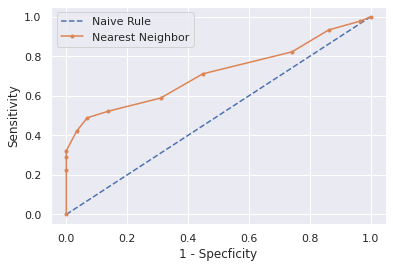

In [162]:
# generate a no skill prediction (majority class) or the Naive rule
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Rule: ROC AUC=%.3f' % (ns_auc))
print('NNA: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive Rule')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Nearest Neighbor')

# axis labels
plt.xlabel('1 - Specficity')
plt.ylabel('Sensitivity')
# show the legend
plt.legend()
# show the plot
plt.show()

Varying different nearest neighbor number from 1 to 9


Writing the for loop through different k 

In [152]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 20,2)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))
test_hitrate = np.empty(len(dep))
test_false_pos = np.empty(len(dep))
test_false_neg = np.empty(len(dep))
test_sens = np.empty(len(dep))
test_spec = np.empty(len(dep))
test_one_minus_spec = np.empty(len(dep))


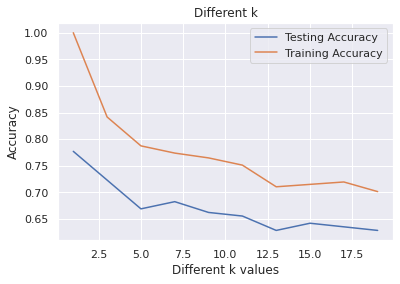

In [154]:
# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')


    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    

# Generate plot
plt.title('Different k')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Different k values')
plt.ylabel('Accuracy')
plt.show()

In [155]:
# Create a function to create a list
def createList(r1, r2): 
    return [item for item in range(r1, r2+1)] 
      
# testing it out:
r1, r2 = -1, 1
print(createList(r1, r2))

[-1, 0, 1]


In [156]:
NNA_hitrate_summary = pd.DataFrame(train_accuracy)
NNA_hitrate_summary.rename(columns={0:'train_accuracy'},inplace = True)
NNA_hitrate_summary['test_accuracy'] =test_accuracy
NNA_hitrate_summary['Check_for_vaild'] = NNA_hitrate_summary['train_accuracy']-NNA_hitrate_summary['test_accuracy']
NNA_hitrate_summary['k_value']=np.arange(1, 20,2)

# Moving the last column to the front
cols = NNA_hitrate_summary.columns.tolist()
cols = cols[-1:] + cols[:-1]
NNA_hitrate_summary = NNA_hitrate_summary[cols]

In [157]:
NNA_hitrate_summary

,k_value,train_accuracy,test_accuracy,Check_for_vaild
0,1,1.000000,0.777027,0.222973
1,3,0.841629,0.722973,0.118656
2,5,0.787330,0.668919,0.118411
3,7,0.773756,0.682432,0.091323
4,9,0.764706,0.662162,0.102544
5,11,0.751131,0.655405,0.095726
6,13,0.710407,0.628378,0.082029
7,15,0.714932,0.641892,0.073040
8,17,0.719457,0.635135,0.084322
9,19,0.701357,0.628378,0.072979


###################################Logistic Regressoin

Need to look into forward selection 


Need to look into backward selection 

Need to get odds-ratio

In [163]:
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [164]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_validate1=logreg.predict(X_test)
y_pred_train1 = logreg.predict(X_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [165]:
# Displaying Confusion_matrix
confValid1 = confusion_matrix(y_test, y_pred_validate1)
confTrain1 = confusion_matrix(y_train, y_pred_train1)

In [166]:
#Output Model Metrics
print("\033[1m Naive Rule: \033[0m", str(round(Naive_rule,2)) + "%")
print("\033[1m Training hitrate: \033[0m" + str(round(calcHR(confTrain1),2)) + "%")
print("\033[1m Validation hitrate: \033[0m"+ str(round(calcHR(confValid1),2)) + "%")
print(" ")
print("\033[1m False Positives: \033[0m"+ str(round(calcFP(confValid1),2)) + "%")
print("\033[1m False Negatives: \033[0m"+ str(round(calcFN(confValid1),2)) + "%")
print(" ")
print("\033[1m Sensitivity: \033[0m"+ str(round(calcSens(confValid1),2)) + "%")
print("\033[1m Specificity: \033[0m"+ str(round(calcSpec(confValid1),2)) + "%")
print(" ")
print("\033[1m 1 - Specficity: \033[0m"+ str(round(100-calcSpec(confValid1),2)) + "%")

 Naive Rule:  60.81%
 Training hitrate: 91.86%
 Validation hitrate: 93.24%
 
 False Positives: 2.38%
 False Negatives: 12.5%
 
 Sensitivity: 91.11%
 Specificity: 96.55%
 
 1 - Specficity: 3.45%


Logistic Model's ROC Curve

Naive Rule: AUROC = 0.500
Logistic: AUROC = 0.975


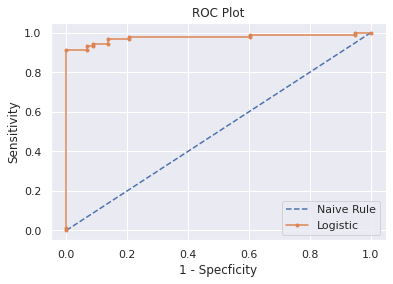

In [167]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = logreg.predict_proba(X_test)

rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('Naive Rule: AUROC = %.3f' % (r_auc))
print('Logistic: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Naive Rule')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic')
plt.title('ROC Plot')
plt.xlabel('1 - Specficity')
plt.ylabel('Sensitivity')
plt.legend() #
plt.show()

In [168]:
base = np.exp(logreg.intercept_).astype('float')
model_odds = pd.DataFrame(df_ckd_predictors.columns)
model_odds['odds-ratio'] = pd.DataFrame(np.exp(logreg.coef_ * 1 + logreg.intercept_)).transpose()/base
model_odds.rename(columns={0:'predictors'},inplace = True)

In [169]:
model_odds

,predictors,odds-ratio
0,age,0.980526
1,bp,1.105764
2,bgr,1.052317
3,bu,1.022650
4,sc,1.153905
5,sod,1.067384
6,hemo,0.789674
7,pcv,0.602822
8,wc,1.000169
9,rc,0.931976


######################## Random Forest

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [171]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True)
model.fit(X_train, y_train.values.ravel())
y_pred_validate2=model.predict(X_test)
y_pred_train2 = model.predict(X_train)


Finding the most important variables.

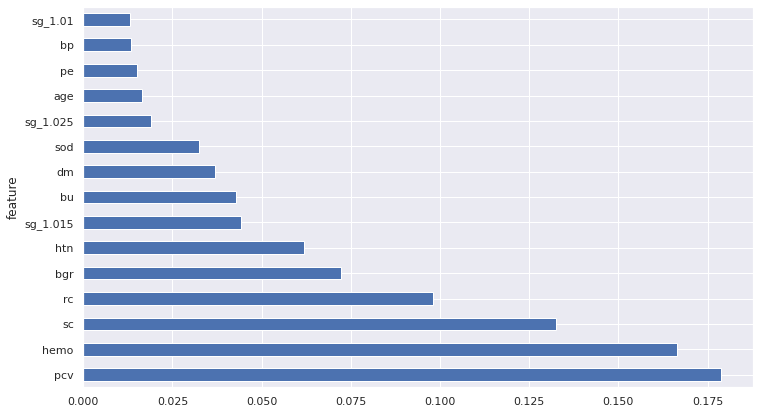

In [172]:
fi = pd.DataFrame({'feature': list(X_train.columns),
'importance': model.feature_importances_}).\
sort_values('importance', ascending = False)
fi.head()

def plot_fi(fi):
    return fi.plot('feature','importance','barh', figsize=(12,7), legend=False)

# fi[:15] label the number of variable cutoff
plot_fi(fi[:15]);

In [173]:
# Displaying Confusion_matrix
confValid2 = confusion_matrix(y_test, y_pred_validate2)
confTrain2 = confusion_matrix(y_train, y_pred_train2)

In [174]:
confValid2

array([[57,  1],
       [ 2, 88]])

In [175]:
#Output Model Metrics
print("\033[1m Naive Rule: \033[0m", str(round(Naive_rule,2)) + "%")
print("\033[1m Training hitrate: \033[0m" + str(round(calcHR(confTrain2),2)) + "%")
print("\033[1m Validation hitrate: \033[0m"+ str(round(calcHR(confValid2),2)) + "%")
print(" ")
print("\033[1m False Positives: \033[0m"+ str(round(calcFP(confValid2),2)) + "%")
print("\033[1m False Negatives: \033[0m"+ str(round(calcFN(confValid2),2)) + "%")
print(" ")
print("\033[1m Sensitivity: \033[0m"+ str(round(calcSens(confValid2),2)) + "%")
print("\033[1m Specificity: \033[0m"+ str(round(calcSpec(confValid2),2)) + "%")
print(" ")
print("\033[1m 1 - Specficity: \033[0m"+ str(round(100-calcSpec(confValid2),2)) + "%")

 Naive Rule:  60.81%
 Training hitrate: 100.0%
 Validation hitrate: 97.97%
 
 False Positives: 1.12%
 False Negatives: 3.39%
 
 Sensitivity: 97.78%
 Specificity: 98.28%
 
 1 - Specficity: 1.72%


Creating an ROC Curve

Naive Rule: AUROC = 0.500
Random Forest: AUROC = 0.999


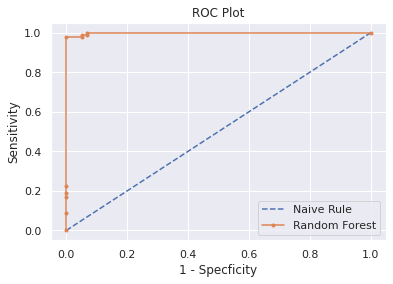

In [176]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(X_test)

rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('Naive Rule: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Naive Rule')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.title('ROC Plot')
plt.xlabel('1 - Specficity')
plt.ylabel('Sensitivity')
plt.legend() #
plt.show()

Fine tuning the Randomforest
Varying the branches of the randomforest

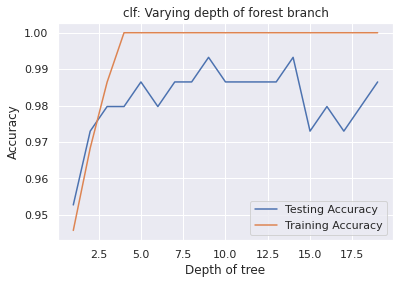

In [177]:
dep = np.arange(1, 20)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i, k in enumerate(dep):
    clf = RandomForestClassifier(max_depth=k)

    clf.fit(X_train, y_train.values.ravel())

    train_accuracy[i] = clf.score(X_train, y_train)

    test_accuracy[i] = clf.score(X_test, y_test)

plt.title('clf: Varying depth of forest branch')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [178]:
RF_hitrate_summary = pd.DataFrame(train_accuracy)
RF_hitrate_summary.rename(columns={0:'train_accuracy'},inplace = True)
RF_hitrate_summary['test_accuracy'] =test_accuracy
RF_hitrate_summary['Check_for_vaild'] = RF_hitrate_summary['train_accuracy']-RF_hitrate_summary['test_accuracy']
RF_hitrate_summary['Depth of tree']=createList(1, 19)

# Moving the last column to the front
cols = RF_hitrate_summary.columns.tolist()
cols = cols[-1:] + cols[:-1]
RF_hitrate_summary = RF_hitrate_summary[cols]

In [179]:
RF_hitrate_summary

,Depth of tree,train_accuracy,test_accuracy,Check_for_vaild
0,1,0.945701,0.952703,-0.007001
1,2,0.968326,0.972973,-0.004647
2,3,0.986425,0.979730,0.006696
3,4,1.000000,0.979730,0.020270
4,5,1.000000,0.986486,0.013514
5,6,1.000000,0.979730,0.020270
6,7,1.000000,0.986486,0.013514
7,8,1.000000,0.986486,0.013514
8,9,1.000000,0.993243,0.006757
9,10,1.000000,0.986486,0.013514


##############################
Ideas for some improvement on NNA and Logistic
* Use the important variable identified from Random Forest
* hemo, pcv, sc, rc

In [180]:
df_ckd_response = df_ckd_1['classification']
features=['hemo','pcv','sc','rc']
df_ckd_predictors = df_ckd_1[features]
X_train, X_test, y_train, y_test = train_test_split(df_ckd_predictors, df_ckd_response, test_size=0.4, random_state=9)

K-NN

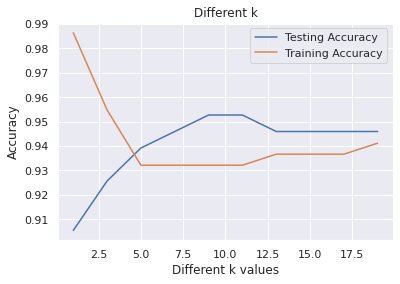

In [185]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 20, 2)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))
test_hitrate = np.empty(len(dep))
test_false_pos = np.empty(len(dep))
test_false_neg = np.empty(len(dep))
test_sens = np.empty(len(dep))
test_spec = np.empty(len(dep))
test_one_minus_spec = np.empty(len(dep))
# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')


    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)


# Generate plot
plt.title('Different k')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Different k values')
plt.ylabel('Accuracy')
plt.show()

In [186]:
NNA_hitrate_summary = pd.DataFrame(train_accuracy)
NNA_hitrate_summary.rename(columns={0:'train_accuracy'},inplace = True)
NNA_hitrate_summary['test_accuracy'] =test_accuracy
NNA_hitrate_summary['Check_for_vaild'] = NNA_hitrate_summary['train_accuracy']-NNA_hitrate_summary['test_accuracy']
NNA_hitrate_summary['k_value']=np.arange(1, 20, 2)

# Moving the last column to the front
cols = NNA_hitrate_summary.columns.tolist()
cols = cols[-1:] + cols[:-1]
NNA_hitrate_summary = NNA_hitrate_summary[cols]

In [187]:
NNA_hitrate_summary

,k_value,train_accuracy,test_accuracy,Check_for_vaild
0,1,0.986425,0.905405,0.081020
1,3,0.954751,0.925676,0.029075
2,5,0.932127,0.939189,-0.007062
3,7,0.932127,0.945946,-0.013819
4,9,0.932127,0.952703,-0.020576
5,11,0.932127,0.952703,-0.020576
6,13,0.936652,0.945946,-0.009294
7,15,0.936652,0.945946,-0.009294
8,17,0.936652,0.945946,-0.009294
9,19,0.941176,0.945946,-0.004769


In [188]:
# Use K = 3
# Classifier with Euclidean distance for determining the proximity between neighboring points

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_validate = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [189]:
# Confusion matrix

confValid = confusion_matrix(y_test, y_pred_validate)
confTrain = confusion_matrix(y_train, y_pred_train)

In [190]:
#Output Model Metrics
print("\033[1m Naive Rule: \033[0m", str(round(Naive_rule,2)) + "%")
print("\033[1m Training hitrate: \033[0m" + str(round(calcHR(confTrain),2)) + "%")
print("\033[1m Validation hitrate: \033[0m"+ str(round(calcHR(confValid),2)) + "%")
print(" ")
print("\033[1m False Positives: \033[0m"+ str(round(calcFP(confValid),2)) + "%")
print("\033[1m False Negatives: \033[0m"+ str(round(calcFN(confValid),2)) + "%")
print(" ")
print("\033[1m Sensitivity: \033[0m"+ str(round(calcSens(confValid),2)) + "%")
print("\033[1m Specificity: \033[0m"+ str(round(calcSpec(confValid),2)) + "%")
print(" ")
print("\033[1m 1 - Specficity: \033[0m"+ str(round(100-calcSpec(confValid),2)) + "%")

 Naive Rule:  60.81%
 Training hitrate: 95.48%
 Validation hitrate: 92.57%
 
 False Positives: 3.53%
 False Negatives: 12.7%
 
 Sensitivity: 91.11%
 Specificity: 94.83%
 
 1 - Specficity: 5.17%


Naive Rule: ROC AUC=0.500
NNA: ROC AUC=0.969


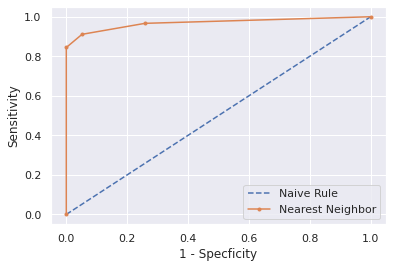

In [191]:
# generate a no skill prediction (majority class) or the Naive rule
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Naive Rule: ROC AUC=%.3f' % (ns_auc))
print('NNA: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Naive Rule')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Nearest Neighbor')

# axis labels
plt.xlabel('1 - Specficity')
plt.ylabel('Sensitivity')
# show the legend
plt.legend()
# show the plot
plt.show()

# Logistic 

In [192]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_validate1=logreg.predict(X_test)
y_pred_train1 = logreg.predict(X_train)


In [193]:
# Displaying Confusion_matrix
confValid4 = confusion_matrix(y_test, y_pred_validate1)
confTrain4 = confusion_matrix(y_train, y_pred_train1)

In [194]:
#Output Model Metrics
print("\033[1m Naive Rule: \033[0m", str(round(Naive_rule,2)) + "%")
print("\033[1m Training hitrate: \033[0m" + str(round(calcHR(confTrain4),2)) + "%")
print("\033[1m Validation hitrate: \033[0m"+ str(round(calcHR(confValid4),2)) + "%")
print(" ")
print("\033[1m False Positives: \033[0m"+ str(round(calcFP(confValid4),2)) + "%")
print("\033[1m False Negatives: \033[0m"+ str(round(calcFN(confValid4),2)) + "%")
print(" ")
print("\033[1m Sensitivity: \033[0m"+ str(round(calcSens(confValid4),2)) + "%")
print("\033[1m Specificity: \033[0m"+ str(round(calcSpec(confValid4),2)) + "%")
print(" ")
print("\033[1m 1 - Specficity: \033[0m"+ str(round(100-calcSpec(confValid4),2)) + "%")

 Naive Rule:  60.81%
 Training hitrate: 94.57%
 Validation hitrate: 93.92%
 
 False Positives: 3.45%
 False Negatives: 9.84%
 
 Sensitivity: 93.33%
 Specificity: 94.83%
 
 1 - Specficity: 5.17%


Naive Rule: AUROC = 0.500
Logistic: AUROC = 0.977


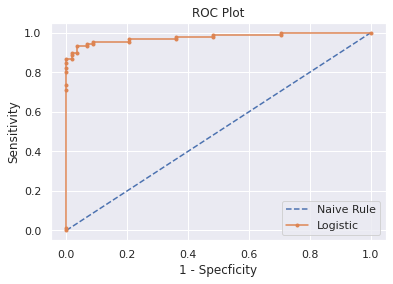

In [195]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = logreg.predict_proba(X_test)

rf_probs = rf_probs[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

print('Naive Rule: AUROC = %.3f' % (r_auc))
print('Logistic: AUROC = %.3f' % (rf_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Naive Rule')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Logistic')
plt.title('ROC Plot')
plt.xlabel('1 - Specficity')
plt.ylabel('Sensitivity')
plt.legend() #
plt.show()

In [196]:
base = np.exp(logreg.intercept_).astype('float')
model_odds = pd.DataFrame(df_ckd_predictors.columns)
model_odds['odds-ratio'] = pd.DataFrame(np.exp(logreg.coef_ * 1 + logreg.intercept_)).transpose()/base
model_odds.rename(columns={0:'predictors'},inplace = True)

In [197]:
model_odds

,predictors,odds-ratio
0,hemo,0.476568
1,pcv,0.815287
2,sc,4.005836
3,rc,0.479937
